In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [28]:
data = pd.read_csv('20.csv', index_col=0) # Download a premade data set
print(data)

        S0  S1  S2  S3  S4  S5  S6  S7  S8  S9  ...  S390  S391  S392  S393  \
1.6:0    1   1   1   1   1   1   1   1   1   1  ...     1     1     1     1   
1.6:1    1   1   1   1   1   1   1   1   1   1  ...     1     1     1     1   
1.6:2    1   1   1   1   1   1   1   1   1   1  ...     1     1     1     1   
1.6:3   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  ...    -1    -1    -1    -1   
1.6:4    1   1   1   1   1   1   1   1   1   1  ...     1     1     1     1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
2.9:95  -1   1   1   1   1   1   1   1  -1   1  ...    -1    -1    -1    -1   
2.9:96  -1  -1   1  -1  -1  -1   1   1  -1  -1  ...     1    -1     1     1   
2.9:97  -1  -1  -1   1  -1  -1   1  -1  -1   1  ...    -1    -1    -1    -1   
2.9:98  -1  -1  -1  -1  -1   1   1   1  -1  -1  ...    -1     1     1     1   
2.9:99  -1  -1  -1   1   1  -1   1   1   1  -1  ...    -1    -1    -1    -1   

        S394  S395  S396  S397  S398  S399  
1.6:0 

In [7]:
# Center and Scale the Data. Avg value will be 1 and the standard dev will be 1.

scaled_data = preprocessing.scale(data)
# Notice the thing is transposed
# sklearn calculated standard dev as population, not sample

# Performs PCA
pca = PCA()
pca.fit(scaled_data)
pca_data= pca.transform(scaled_data)
print(pca_data.shape)

(1400, 400)


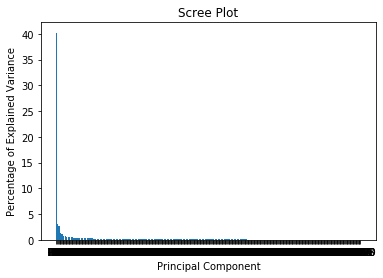

In [8]:
# Graphing Percentage of Variance for each PC
per_var = np.round(pca.explained_variance_ratio_* 100, decimals= 1) # Calculates the percentage of variance for each PC
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)] # labels for each PC

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [14]:
# Plot PC1 against PC2
pcaDF = pd.DataFrame(pca_data, columns = labels)
#print(pcaDF)
t = []
for i in range(1400):
    j = 0
    while j < 100:
        t.append(i[:4])
        j += 1
plt.scatter(pcaDF.PC1, pcaDF.PC2, c=t, cmap= "seismic", s = 1)
plt.show()

TypeError: 'int' object is not subscriptable